# Finalized neut curves for selected sera
This notebook consolidates the finalized neut data for the 10 sera from each age cohort selected for DMS experiments. 

For some samples, I use the curves from the initial 'rough' runs, as the goal is just to estimate IC99 for serum selections (which will not be a precise conversion to DMS escape fraction anyways). 

Neutralization curves for each age cohort are saved in `figures/`. See `serum_screening.ipynb` for analysis of all neut data from serum screening.

In [1]:
import pandas as pd

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import matplotlib
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 0-5yo sera

In [2]:
# clean run of top 5 candidates
data_1 = pd.read_csv('neut_data/230215_final-neuts_tidy.csv')

# get next 3 candidates from prior run
data_2 = pd.read_csv('neut_data/230212_neuts_tidy.csv')
data_2 = data_2[data_2['serum'].isin([2388, 3973, 2463])]

# get final 2 candidates
data_3 = pd.read_csv('neut_data/230228_neuts_tidy.csv')
data_3 = data_3[(data_3['serum'].isin([4299, 4584])) & 
                (data_3['virus']!= 'H6')]

# concat to single df
ped_data_final = pd.concat([data_1, data_2, data_3])

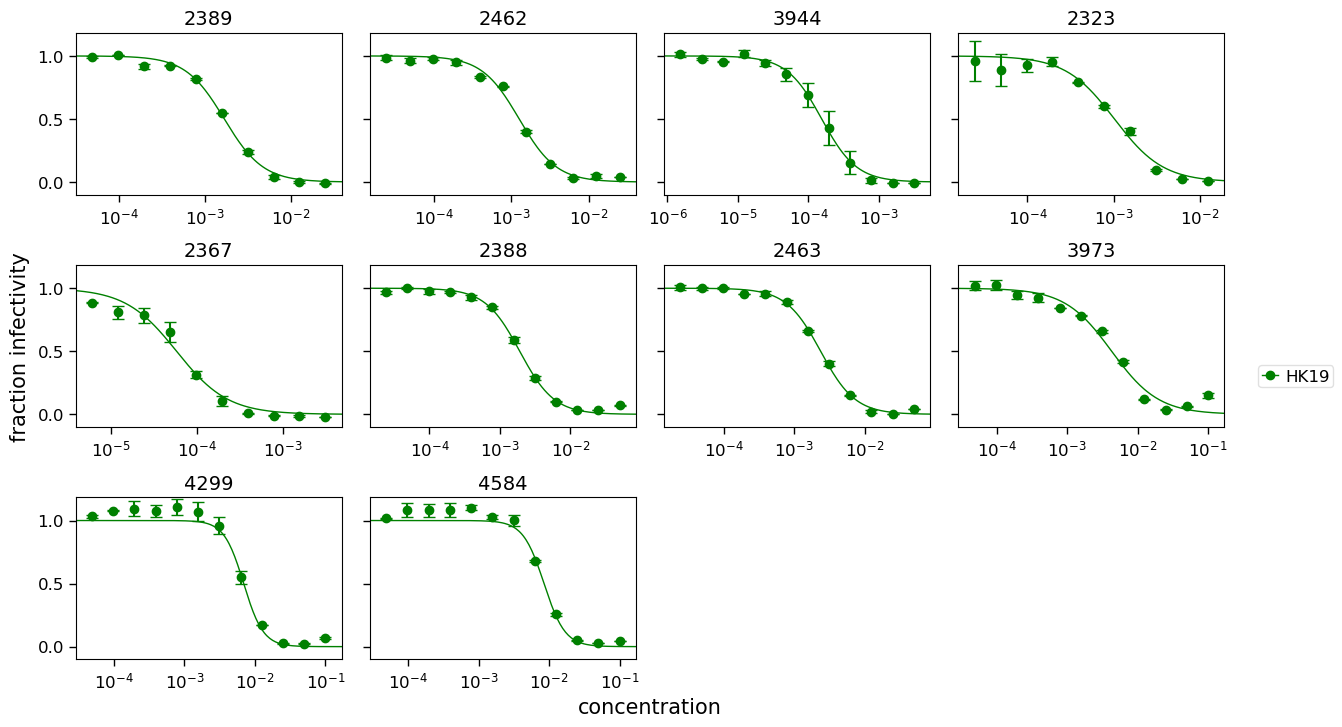

In [3]:
ped_fits = neutcurve.CurveFits(ped_data_final)

fig, axes = ped_fits.plotSera(ncol=4,
                          virus_to_color_marker={
                              'HK19': ('green', 'o'),
                          },
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [14, 8]])
plt.savefig('figures/ped_sera_final.pdf', bbox_inches=bbox)

In [4]:
ped_ic99 = ped_fits.fitParams(ics=[99])
ped_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
4,2367,HK19,average,2,0.001360,interpolated,0.00136,0.000058,1.460079,1,0
2,3944,HK19,average,2,0.002136,interpolated,0.00214,0.000154,1.749001,1,0
3,2323,HK19,average,2,0.012500,lower,>0.0125,0.001023,1.534783,1,0
1,2462,HK19,average,2,0.016202,interpolated,0.0162,0.001266,1.802666,1,0
0,2389,HK19,average,2,0.018183,interpolated,0.0182,0.001676,1.927579,1,0
5,2388,HK19,average,2,0.025378,interpolated,0.0254,0.001915,1.778067,1,0
8,4299,HK19,average,2,0.030265,interpolated,0.0303,0.006930,3.117191,1,0
6,2463,HK19,average,2,0.031925,interpolated,0.0319,0.002381,1.770261,1,0
9,4584,HK19,average,2,0.041114,interpolated,0.0411,0.008466,2.907743,1,0
7,3973,HK19,average,2,0.100000,lower,>0.1,0.004298,1.307293,1,0


### 15-20yo sera

In [5]:
# Clean run of top 6 candidates
data_1 = pd.read_csv('neut_data/230307_neuts_tidy.csv')

# Pull last 4 candidates from initial rough screen
data_2 = pd.read_csv('neut_data/230303_neuts_tidy.csv')
data_2 = data_2[data_2['serum'].isin([3857, 2380, 3856, 3895])]

# concat to single df
teen_data_final = pd.concat([data_1, data_2])

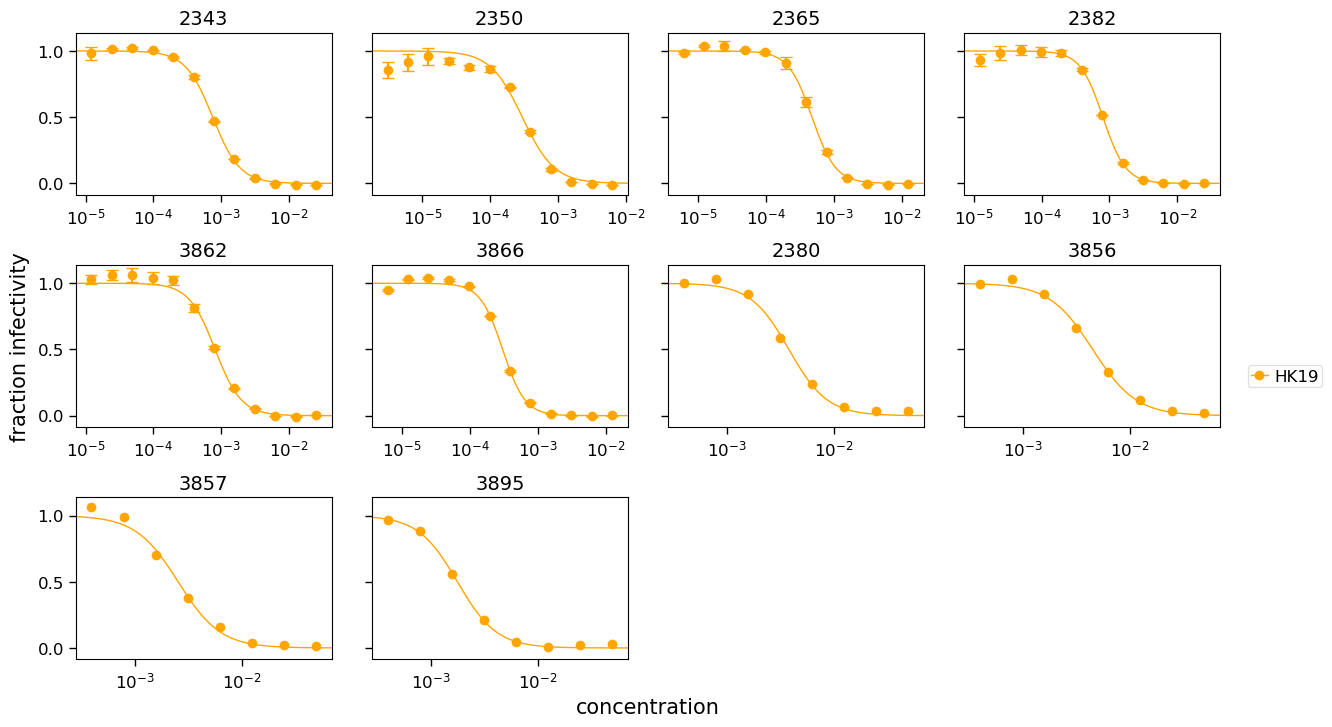

In [6]:
# fit with neutcurve package
teen_fits = neutcurve.CurveFits(teen_data_final)

fig, axes = teen_fits.plotSera(ncol=4,
                          virus_to_color_marker={
                              'HK19': ('orange', 'o'),
                          },
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [14, 8]])
plt.savefig('figures/teen_sera_final.pdf', bbox_inches=bbox)

In [7]:
teen_ic99 = teen_fits.fitParams(ics=[99])
teen_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
5,3866,HK19,average,2,0.001737,interpolated,0.00174,0.000304,2.634083,1,0
2,2365,HK19,average,2,0.003005,interpolated,0.00301,0.000477,2.496628,1,0
1,2350,HK19,average,2,0.003603,interpolated,0.0036,0.000296,1.839504,1,0
3,2382,HK19,average,2,0.004743,interpolated,0.00474,0.000801,2.583242,1,0
0,2343,HK19,average,2,0.006258,interpolated,0.00626,0.000748,2.163454,1,0
4,3862,HK19,average,2,0.006307,interpolated,0.00631,0.000813,2.242576,1,0
9,3895,HK19,average,1,0.012415,interpolated,0.0124,0.001766,2.356070,1,0
8,3857,HK19,average,1,0.020881,interpolated,0.0209,0.002539,2.180659,1,0
6,2380,HK19,average,1,0.025507,interpolated,0.0255,0.003800,2.413440,1,0
7,3856,HK19,average,1,0.038777,interpolated,0.0388,0.004492,2.131809,1,0


### 40-45yo sera

In [8]:
# Clean run of top 5 candidates
data_1 = pd.read_csv('neut_data/230418_adult-sera-final_tidy.csv')

# Pull last 5 candidates from initial rough screen
data_2 = pd.read_csv('neut_data/230417_adult-neuts_tidy_edited.csv')
data_2 = data_2[data_2['serum'].isin(['74C', '18C', '210C', '150C', '68C'])]

# concat to single df
adult_data_final = pd.concat([data_1, data_2])

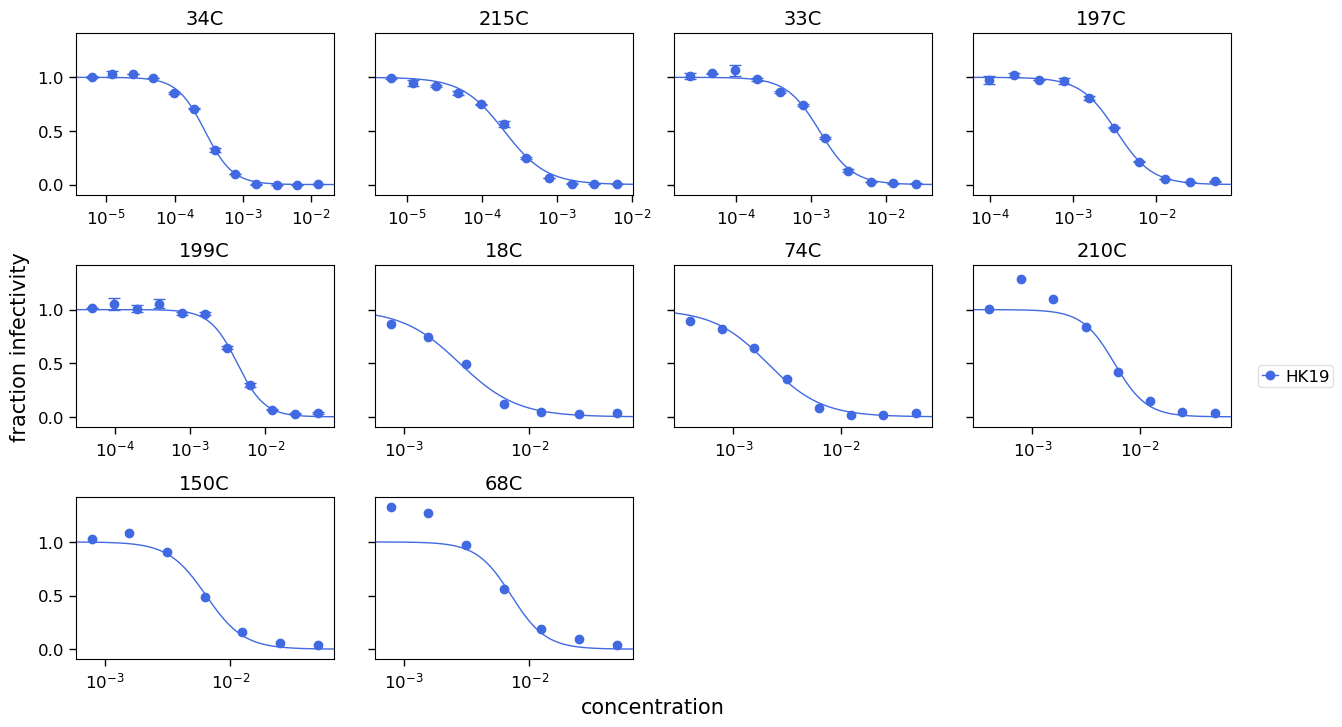

In [9]:
# fit with neutcurve package
adult_fits = neutcurve.CurveFits(adult_data_final)

fig, axes = adult_fits.plotSera(ncol=4,
                          virus_to_color_marker={
                              'HK19': ('royalblue', 'o'),
                          },
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [14, 8]])
plt.savefig('figures/adult_sera_final.pdf', bbox_inches=bbox)

In [10]:
adult_ic99 = adult_fits.fitParams(ics=[99])
adult_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,34C,HK19,average,2,0.002399,interpolated,0.0024,0.000279,2.135661,1,0
1,215C,HK19,average,2,0.003920,interpolated,0.00392,0.000198,1.540072,1,0
2,33C,HK19,average,2,0.013415,interpolated,0.0134,0.001307,1.973236,1,0
7,210C,HK19,average,1,0.028342,interpolated,0.0283,0.005798,2.895666,1,0
4,199C,HK19,average,2,0.028933,interpolated,0.0289,0.004247,2.394697,1,0
6,74C,HK19,average,1,0.029980,interpolated,0.03,0.002076,1.720802,1,0
9,68C,HK19,average,1,0.031041,interpolated,0.031,0.007191,3.141910,1,0
8,150C,HK19,average,1,0.031490,interpolated,0.0315,0.006416,2.888437,1,0
3,197C,HK19,average,2,0.031601,interpolated,0.0316,0.003295,2.032573,1,0
5,18C,HK19,average,1,0.031634,interpolated,0.0316,0.002783,1.890333,1,0
